### 3.DBSCAN

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv("base_pronta.csv", sep=";")

In [3]:
df.sample(3)

,CO_UF,UF,SIG_UF,CO_MUNICIPIO,MUNICIPIO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_ENTIDADE,NOME_ENTIDADE,POPULACAO_ESTIMADA,N_MATRICULA_MUN_19,N_MATRICULA_ENT_19,N_MATRICULA_INTEGRAL_ENT_19,N_MATRICULA_MUN_20,N_MATRICULA_ENT_20,N_MATRICULA_INTEGRAL_ENT_20,SCORE_MAT_MUN_20_19,SCORE_MAT_ENT_20_19,SCORE_MAT_INTEGRAL_ENT_20_19
3701,52,Goias,GO,5214606,Niquelândia,5202,52004,52009106,ESC MUL PE VALENTIM RODRIGUES,46388,8114,708,16.0,7634,749,17.0,0.940843,1.057910,1.062500
80,52,Goias,GO,5201405,Aparecida de Goiânia,5203,52010,52101207,CENTRO MUNICIPAL DE EDUCACAO INFANTIL VILA DEL...,578179,116323,192,192.0,118693,183,183.0,1.020374,0.953125,0.953125
2232,52,Goias,GO,5208707,Goiânia,5203,52010,52034364,COLEGIO MASTER,1516113,279830,270,0.0,276809,212,0.0,0.989204,0.785185,0.000000


In [4]:
df.shape

(4486, 19)

In [5]:
df.columns.tolist()

['CO_UF',
 'UF',
 'SIG_UF',
 'CO_MUNICIPIO',
 'MUNICIPIO',
 'CO_MESORREGIAO',
 'CO_MICRORREGIAO',
 'CO_ENTIDADE',
 'NOME_ENTIDADE',
 'POPULACAO_ESTIMADA',
 'N_MATRICULA_MUN_19',
 'N_MATRICULA_ENT_19',
 'N_MATRICULA_INTEGRAL_ENT_19',
 'N_MATRICULA_MUN_20',
 'N_MATRICULA_ENT_20',
 'N_MATRICULA_INTEGRAL_ENT_20',
 'SCORE_MAT_MUN_20_19',
 'SCORE_MAT_ENT_20_19',
 'SCORE_MAT_INTEGRAL_ENT_20_19']

In [6]:
df.describe()

,CO_UF,CO_MUNICIPIO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_ENTIDADE,POPULACAO_ESTIMADA,N_MATRICULA_MUN_19,N_MATRICULA_ENT_19,N_MATRICULA_INTEGRAL_ENT_19,N_MATRICULA_MUN_20,N_MATRICULA_ENT_20,N_MATRICULA_INTEGRAL_ENT_20,SCORE_MAT_MUN_20_19,SCORE_MAT_ENT_20_19,SCORE_MAT_INTEGRAL_ENT_20_19
count,4486.0,4.486000e+03,4486.000000,4486.000000,4.486000e+03,4.486000e+03,4486.000000,4486.000000,4486.000000,4486.00000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000
mean,52.0,5.210452e+06,5203.496879,52010.203968,5.206964e+07,3.500898e+05,68069.947169,334.284440,22.965671,67360.78667,329.398796,21.827686,0.978279,1.005872,0.447224
std,0.0,6.404880e+03,1.075257,3.732301,4.525006e+04,5.466981e+05,100391.516837,314.563188,56.259014,99350.24438,310.384898,55.454232,0.057299,0.296979,4.565774
min,52.0,5.200050e+06,5201.000000,52001.000000,5.200003e+07,1.149000e+03,169.000000,3.000000,0.000000,176.00000,3.000000,0.000000,0.424161,0.041667,0.000000
25%,52.0,5.205497e+06,5203.000000,52007.000000,5.203721e+07,1.847800e+04,3837.000000,117.000000,0.000000,3604.00000,112.000000,0.000000,0.962259,0.901830,0.000000
50%,52.0,5.208707e+06,5203.000000,52010.000000,5.206961e+07,7.137600e+04,19219.000000,232.000000,0.000000,17097.00000,230.000000,0.000000,0.989204,0.989092,0.000000
75%,52.0,5.215306e+06,5204.000000,52012.000000,5.209326e+07,3.869230e+05,89054.000000,453.000000,3.000000,85693.00000,449.000000,2.000000,1.011497,1.070212,0.000000
max,52.0,5.222302e+06,5205.000000,52018.000000,5.229036e+07,1.516113e+06,279830.000000,4036.000000,822.000000,276809.00000,2736.000000,828.000000,1.139116,7.862745,187.000000


#### Instanciando base de teste com atributos de interesse:

In [7]:
X = df[[
       'CO_MESORREGIAO',
       'CO_MICRORREGIAO',
       'POPULACAO_ESTIMADA',
       'SCORE_MAT_MUN_20_19',
       'SCORE_MAT_ENT_20_19',
       'SCORE_MAT_INTEGRAL_ENT_20_19'
    ]]

In [8]:
def check_missing_att(df):
    # verificando atributos faltantes
    for var in df:
        # somamos o número de variáveis nulas (NaN)
        nullatt = np.sum(df[var].isnull())
        if nullatt > 0:
            print(var,"- faltantes: ", end='')
            print(nullatt)

In [9]:
check_missing_att(X)

In [10]:
X.sample(3)

,CO_MESORREGIAO,CO_MICRORREGIAO,POPULACAO_ESTIMADA,SCORE_MAT_MUN_20_19,SCORE_MAT_ENT_20_19,SCORE_MAT_INTEGRAL_ENT_20_19
3706,5205,52016,31458,0.975975,0.974217,0.0
1164,5202,52005,9709,0.887405,0.600000,0.0
2514,5203,52010,1516113,0.989204,1.016216,0.0


#### Garantindo que os atributos "score" não possuem valores NaN

In [11]:
# substituir - por 0
X = X.fillna(0)

In [12]:
check_missing_att(X)

In [13]:
X.sample(3)

,CO_MESORREGIAO,CO_MICRORREGIAO,POPULACAO_ESTIMADA,SCORE_MAT_MUN_20_19,SCORE_MAT_ENT_20_19,SCORE_MAT_INTEGRAL_ENT_20_19
2920,5203,52010,29850,0.994130,0.801008,0.0
2483,5205,52015,3881,1.039517,0.993421,0.0
1684,5204,52012,168468,0.966079,0.986272,0.0


#### DBSCAN sem normalização dos dados:

In [14]:
db = DBSCAN(eps=0.2, min_samples=10).fit(X)

In [15]:
y_ = db.labels_

In [16]:
X['DBSCAN'] = y_

In [17]:
# X.query["DBSCAN == -1"]

In [18]:
X.loc[X['DBSCAN'] == -1]

,CO_MESORREGIAO,CO_MICRORREGIAO,POPULACAO_ESTIMADA,SCORE_MAT_MUN_20_19,SCORE_MAT_ENT_20_19,SCORE_MAT_INTEGRAL_ENT_20_19,DBSCAN
4,5203,52007,42900,0.939561,0.720461,0.068182,-1
5,5203,52010,11231,1.005732,1.138282,0.000000,-1
9,5203,52009,13292,0.806452,0.463918,0.000000,-1
11,5203,52010,1516113,0.989204,1.177264,3.000000,-1
15,5202,52005,7624,1.031447,1.000000,0.000000,-1
...,...,...,...,...,...,...,...
4477,5205,52014,3827,0.952024,0.861386,0.000000,-1
4479,5204,52012,27653,0.926245,0.463722,0.000000,-1
4481,5204,52011,12949,0.905682,0.949045,0.000000,-1
4484,5205,52016,3072,0.975000,0.736462,0.000000,-1


#### DBSCAN: Ajustando os parâmetros:

- eps: float, padrão = 0,5

    A distância máxima entre duas amostras para que uma seja considerada próxima da outra. Este não é um limite máximo para as distâncias de pontos dentro de um cluster. Este é o parâmetro DBSCAN mais importante para escolher apropriadamente para seu conjunto de dados e função de distância.
    
    

- min_samples: int, default = 5

    O número de amostras (ou peso total) em uma vizinhança para um ponto a ser considerado como um ponto central. Isso inclui o próprio ponto.
    
- Fonte: Documentação Scikit Learn



In [19]:
eps = 0.4
min_samples = 5

In [20]:
db2 = DBSCAN(eps= eps, min_samples= min_samples).fit(X)

In [21]:
y2_ = db2.labels_

In [22]:
X['DBSCAN2'] = y2_

In [23]:
b = []
for x in X['DBSCAN2']:
    if x == -1:
      b.append(x)
    
print("Quantidade de outlier com os parâmetros indicados:", len(b))

Quantidade de outlier com os parâmetros indicados: 899


| eps | min_samples | quant outliers |
| --- | --- | --- |
| 0.5 | 5 | 840 |
| 0.4 | 5 | 899 |

##### Number of features seen during fit:

In [24]:
db2.n_features_in_

7

In [25]:
X.sample(3)

,CO_MESORREGIAO,CO_MICRORREGIAO,POPULACAO_ESTIMADA,SCORE_MAT_MUN_20_19,SCORE_MAT_ENT_20_19,SCORE_MAT_INTEGRAL_ENT_20_19,DBSCAN,DBSCAN2
462,5203,52009,21850,0.859488,0.694444,0.0,-1,57
3989,5203,52006,19882,0.973424,0.467626,0.0,-1,-1
2346,5203,52010,1516113,0.989204,2.303922,0.0,-1,117


#### Instanciando NOVA base de testes. Agora, exclusivamente com variáries numéricas ou de fonte originalmente numérica:

In [26]:
X2 = X[[
       'POPULACAO_ESTIMADA',
       'SCORE_MAT_MUN_20_19',
       'SCORE_MAT_ENT_20_19',
       'SCORE_MAT_INTEGRAL_ENT_20_19'
    ]]

In [27]:
X2.head(3)

,POPULACAO_ESTIMADA,SCORE_MAT_MUN_20_19,SCORE_MAT_ENT_20_19,SCORE_MAT_INTEGRAL_ENT_20_19
0,1516113,0.989204,0.791139,0.0
1,235647,1.045727,1.188869,0.0
2,168468,0.966079,0.876020,0.0


#### Normalizando os dados:

In [28]:
X2 = StandardScaler().fit_transform(X2)

In [29]:
X2

array([[ 2.13308437,  0.19069779, -0.72313812, -0.09796226],
       [-0.20935784,  1.17727102,  0.61626152, -0.09796226],
       [-0.33225289, -0.21293223, -0.43729378, -0.09796226],
       ...,
       [-0.25181196, -0.07408363, -1.17185438, -0.09796226],
       [-0.63482287, -0.0572268 , -0.90726973, -0.09796226],
       [-0.61115635,  0.90618571,  0.18170591, -0.09796226]])

In [30]:
X2.shape

(4486, 4)

### DBSCAN com dados normalizados:

#### Ajuste de parâmetros:

In [31]:
eps = 0.45
min_samples = 5

In [32]:
db3 = DBSCAN(eps= eps, min_samples= min_samples).fit(X2)

y3_ = db3.labels_

y3_.tolist()

C = []
for x in y3_:
    if x == -1:
      C.append(x)
   
print("Quantidade de outlier com os parâmetros indicados:", len(C))

Quantidade de outlier com os parâmetros indicados: 125


| eps | min_samples | quant. outliers |
| --- | --- | --- |
| 0.45 | 5 | 125 |
| 0.5 | 5 | 107 |
| 0.5 | 3 | 79 |
| 1 | 5 | 33 |
| 2 | 5 | 15 |

#### Inserindo o resultado do DBSCAN como atributo do df. Considerando referência do número INEP de escolas goianas com taxa de risco (126).

In [33]:
X.shape

(4486, 8)

In [34]:
X2.shape

(4486, 4)

In [35]:
df.shape

(4486, 19)

In [36]:
df['DBSCAN_NOR'] = db3.labels_

In [37]:
df.sample(1)

,CO_UF,UF,SIG_UF,CO_MUNICIPIO,MUNICIPIO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_ENTIDADE,NOME_ENTIDADE,POPULACAO_ESTIMADA,N_MATRICULA_MUN_19,N_MATRICULA_ENT_19,N_MATRICULA_INTEGRAL_ENT_19,N_MATRICULA_MUN_20,N_MATRICULA_ENT_20,N_MATRICULA_INTEGRAL_ENT_20,SCORE_MAT_MUN_20_19,SCORE_MAT_ENT_20_19,SCORE_MAT_INTEGRAL_ENT_20_19,DBSCAN_NOR
2132,52,Goias,GO,5220009,São João d'Aliança,5202,52005,52014118,COLEGIO ESTADUAL PEDRO LUDOVICO TEIXEIRA,13740,2815,517,0.0,2730,580,0.0,0.969805,1.121857,0.0,1


In [38]:
df.loc[df['DBSCAN_NOR'] == -1]

,CO_UF,UF,SIG_UF,CO_MUNICIPIO,MUNICIPIO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_ENTIDADE,NOME_ENTIDADE,POPULACAO_ESTIMADA,N_MATRICULA_MUN_19,N_MATRICULA_ENT_19,N_MATRICULA_INTEGRAL_ENT_19,N_MATRICULA_MUN_20,N_MATRICULA_ENT_20,N_MATRICULA_INTEGRAL_ENT_20,SCORE_MAT_MUN_20_19,SCORE_MAT_ENT_20_19,SCORE_MAT_INTEGRAL_ENT_20_19,DBSCAN_NOR
9,52,Goias,GO,5207808,Firminópolis,5203,52009,52029220,ESCOLA ESTADUAL JOSE MANOEL DA SILVA,13292,1984,291,0.0,1600,135,0.0,0.806452,0.463918,0.00,-1
115,52,Goias,GO,5221452,Trombas,5202,52004,52011500,COLEGIO ESTADUAL DEPUTADO JOSE PORFIRIO,3500,611,318,0.0,696,425,0.0,1.139116,1.336478,0.00,-1
197,52,Goias,GO,5210406,Itaberaí,5203,52007,52023567,ESCOLA ESTADUAL SAO JOSE DO RETIRO,42900,10490,42,0.0,9856,9,0.0,0.939561,0.214286,0.00,-1
213,52,Goias,GO,5207907,Flores de Goiás,5204,52011,52040780,COLEGIO ESTADUAL MARECHAL HUMBERTO DE ALENCAR ...,16557,2885,599,0.0,2015,146,0.0,0.698440,0.243740,0.00,-1
233,52,Goias,GO,5211909,Jataí,5205,52013,52133206,CASA EVANGELICA MONTE DAS OLIVEIRAS - CEMOL,100882,23357,96,0.0,23130,4,0.0,0.990281,0.041667,0.00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,52,Goias,GO,5203559,Bonfinópolis,5203,52010,52032680,ESCOLA MUNICIPAL HERMINIO LEMES,9706,1915,239,25.0,1976,251,239.0,1.031854,1.050209,9.56,-1
4232,52,Goias,GO,5220686,Simolândia,5204,52011,52075710,ESCOLA MUNICIPAL PEQUENO PRINCIPE,6856,1823,110,20.0,1525,147,0.0,0.836533,1.336364,0.00,-1
4376,52,Goias,GO,5207808,Firminópolis,5203,52009,52029182,COLEGIO ESTADUAL AMERICO GONCALVES FALEIRO,13292,1984,816,0.0,1600,640,0.0,0.806452,0.784314,0.00,-1
4458,52,Goias,GO,5221403,Trindade,5203,52010,52091937,EDUCANDARIO SANTA TEREZINHA,127599,29506,44,0.0,30434,161,0.0,1.031451,3.659091,0.00,-1


#### Instanciando um df noise com os resultados completos das ocorrências outliers:

In [39]:
df_noise = df.loc[df['DBSCAN_NOR'] == -1]

In [40]:
df_noise.shape

(125, 20)

In [70]:
df_noise.to_csv('df_noise_dbscan.csv', encoding='utf-8', sep=';', index = False)

#### Visualizando resultados DBSCAN

<AxesSubplot:xlabel='POPULACAO_ESTIMADA'>

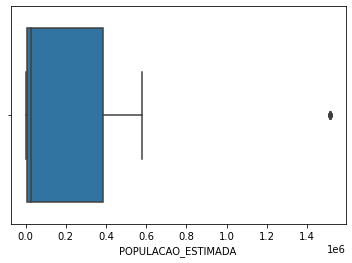

In [55]:
sns.boxplot(x=df_noise['POPULACAO_ESTIMADA'])

<AxesSubplot:xlabel='SCORE_MAT_MUN_20_19'>

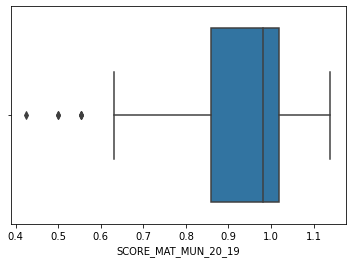

In [57]:
sns.boxplot(x=df_noise['SCORE_MAT_MUN_20_19'], orient="h")

<AxesSubplot:xlabel='SCORE_MAT_ENT_20_19'>

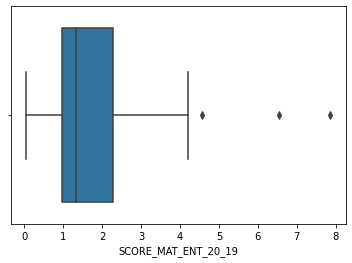

In [58]:
sns.boxplot(x=df_noise['SCORE_MAT_ENT_20_19'], orient="h")

<AxesSubplot:xlabel='SCORE_MAT_INTEGRAL_ENT_20_19'>

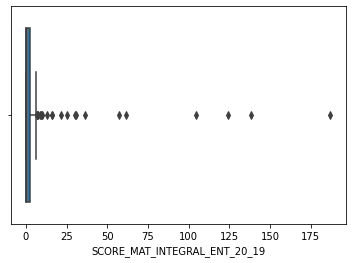

In [59]:
sns.boxplot(x=df_noise['SCORE_MAT_INTEGRAL_ENT_20_19'], orient="h")

In [60]:
df_noise.describe()

,CO_UF,CO_MUNICIPIO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_ENTIDADE,POPULACAO_ESTIMADA,N_MATRICULA_MUN_19,N_MATRICULA_ENT_19,N_MATRICULA_INTEGRAL_ENT_19,N_MATRICULA_MUN_20,N_MATRICULA_ENT_20,N_MATRICULA_INTEGRAL_ENT_20,SCORE_MAT_MUN_20_19,SCORE_MAT_ENT_20_19,SCORE_MAT_INTEGRAL_ENT_20_19,DBSCAN_NOR
count,125.0,1.250000e+02,125.000000,125.000000,1.250000e+02,1.250000e+02,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.0
mean,52.0,5.209135e+06,5203.304000,52009.392000,5.206864e+07,2.672539e+05,52310.520000,294.912000,4.368000,50828.224000,336.688000,24.984000,0.916928,1.695458,7.865541,-1.0
std,0.0,6.326338e+03,1.041277,3.374229,4.975856e+04,4.664431e+05,86663.398428,319.023081,15.092476,83889.952259,324.875421,59.791436,0.153519,1.204223,26.241059,0.0
min,52.0,5.200159e+06,5201.000000,52001.000000,5.200088e+07,1.381000e+03,357.000000,6.000000,0.000000,242.000000,4.000000,0.000000,0.424161,0.041667,0.000000,-1.0
25%,52.0,5.204003e+06,5203.000000,52007.000000,5.203091e+07,4.887000e+03,1041.000000,64.000000,0.000000,1094.000000,115.000000,0.000000,0.859488,0.956873,0.000000,-1.0
50%,52.0,5.208707e+06,5203.000000,52010.000000,5.206805e+07,2.765300e+04,6822.000000,174.000000,0.000000,6568.000000,229.000000,0.000000,0.981582,1.336478,0.000000,-1.0
75%,52.0,5.213103e+06,5204.000000,52011.000000,5.209760e+07,3.869230e+05,89054.000000,422.000000,1.000000,85693.000000,453.000000,16.000000,1.019438,2.277778,2.769231,-1.0
max,52.0,5.221700e+06,5205.000000,52018.000000,5.229036e+07,1.516113e+06,279830.000000,1730.000000,126.000000,276809.000000,1731.000000,283.000000,1.139116,7.862745,187.000000,-1.0


In [61]:
df_noise.to_excel('df_noise_DBSCAN.xlsx')

In [62]:
df_noise.columns.tolist()

['CO_UF',
 'UF',
 'SIG_UF',
 'CO_MUNICIPIO',
 'MUNICIPIO',
 'CO_MESORREGIAO',
 'CO_MICRORREGIAO',
 'CO_ENTIDADE',
 'NOME_ENTIDADE',
 'POPULACAO_ESTIMADA',
 'N_MATRICULA_MUN_19',
 'N_MATRICULA_ENT_19',
 'N_MATRICULA_INTEGRAL_ENT_19',
 'N_MATRICULA_MUN_20',
 'N_MATRICULA_ENT_20',
 'N_MATRICULA_INTEGRAL_ENT_20',
 'SCORE_MAT_MUN_20_19',
 'SCORE_MAT_ENT_20_19',
 'SCORE_MAT_INTEGRAL_ENT_20_19',
 'DBSCAN_NOR']

In [68]:
tab = pd.crosstab(index=df_noise['MUNICIPIO'], columns='count')

tab

col_0,count
MUNICIPIO,
Adelândia,3
Alexânia,2
Anicuns,3
Anápolis,4
Aparecida de Goiânia,15
...,...
Terezópolis de Goiás,1
Trindade,1
Trombas,1


#### Carregando a base de Taxa de risco

In [41]:
df_tr = pd.read_excel('Base_TR\BRASIL_TR_2020_21_ajustada_escola.xlsx')  

In [42]:
df_tr_5 = df_tr.loc[df_tr['TAXA_RISCO_ENT'] >= 5]

In [43]:
df_tr_5.shape

(126, 7)

#### Convergindo Taxa de Risco com outliers DBSCAN:

In [44]:
validacao = df_noise.merge(df_tr_5, on='CO_ENTIDADE')

In [45]:
print("Ocorrências similares na base Isolation Forest e Taxa de risco:", validacao.shape[0])

Ocorrências similares na base Isolation Forest e Taxa de risco: 8


In [46]:
validacao.columns.tolist()

['CO_UF',
 'UF_x',
 'SIG_UF',
 'CO_MUNICIPIO_x',
 'MUNICIPIO',
 'CO_MESORREGIAO',
 'CO_MICRORREGIAO',
 'CO_ENTIDADE',
 'NOME_ENTIDADE_x',
 'POPULACAO_ESTIMADA',
 'N_MATRICULA_MUN_19',
 'N_MATRICULA_ENT_19',
 'N_MATRICULA_INTEGRAL_ENT_19',
 'N_MATRICULA_MUN_20',
 'N_MATRICULA_ENT_20',
 'N_MATRICULA_INTEGRAL_ENT_20',
 'SCORE_MAT_MUN_20_19',
 'SCORE_MAT_ENT_20_19',
 'SCORE_MAT_INTEGRAL_ENT_20_19',
 'DBSCAN_NOR',
 'CODIGO_UF',
 'UF_y',
 'CO_MUNICIPIO_y',
 'NOME_MUNICIPIO',
 'NOME_ENTIDADE_y',
 'TAXA_RISCO_ENT']

In [47]:
validacao_ordenada = validacao[[
    
 'MUNICIPIO',
    
 'POPULACAO_ESTIMADA',
    
 'N_MATRICULA_MUN_19',
    
 'N_MATRICULA_MUN_20',
    
 'SCORE_MAT_MUN_20_19',

 'CO_ENTIDADE',
    
 'NOME_ENTIDADE_x',
    
 'N_MATRICULA_ENT_19',
    
 'N_MATRICULA_ENT_20',
    
 'SCORE_MAT_ENT_20_19',
    
 'N_MATRICULA_INTEGRAL_ENT_19',
    
 'N_MATRICULA_INTEGRAL_ENT_20',
    
 'SCORE_MAT_INTEGRAL_ENT_20_19',
    
 'DBSCAN_NOR',
 
 'TAXA_RISCO_ENT']]

In [48]:
validacao_ordenada.head(3)

,MUNICIPIO,POPULACAO_ESTIMADA,N_MATRICULA_MUN_19,N_MATRICULA_MUN_20,SCORE_MAT_MUN_20_19,CO_ENTIDADE,NOME_ENTIDADE_x,N_MATRICULA_ENT_19,N_MATRICULA_ENT_20,SCORE_MAT_ENT_20_19,N_MATRICULA_INTEGRAL_ENT_19,N_MATRICULA_INTEGRAL_ENT_20,SCORE_MAT_INTEGRAL_ENT_20_19,DBSCAN_NOR,TAXA_RISCO_ENT
0,Cavalcante,9709,2620,2325,0.887405,52014428,ESC MUL DONA JOANA PEREIRA DAS VIRGENS,6,10,1.666667,0.0,0.0,0.0,-1,5
1,Novo Gama,115711,20192,19788,0.979992,52047172,CAIC NOVO GAMA,176,445,2.528409,0.0,0.0,0.0,-1,9
2,Campos Verdes,2141,929,939,1.010764,52006638,COLEGIO ESTADUAL EDMUNDO ROCHA,204,492,2.411765,0.0,0.0,0.0,-1,5


In [49]:
validacao_ordenada.dtypes

MUNICIPIO                        object
POPULACAO_ESTIMADA                int64
N_MATRICULA_MUN_19                int64
N_MATRICULA_MUN_20                int64
SCORE_MAT_MUN_20_19             float64
CO_ENTIDADE                       int64
NOME_ENTIDADE_x                  object
N_MATRICULA_ENT_19                int64
N_MATRICULA_ENT_20                int64
SCORE_MAT_ENT_20_19             float64
N_MATRICULA_INTEGRAL_ENT_19     float64
N_MATRICULA_INTEGRAL_ENT_20     float64
SCORE_MAT_INTEGRAL_ENT_20_19    float64
DBSCAN_NOR                        int64
TAXA_RISCO_ENT                    int64
dtype: object

In [50]:
validacao_ordenada = validacao_ordenada.astype({'N_MATRICULA_INTEGRAL_ENT_19': 'int64', 'N_MATRICULA_INTEGRAL_ENT_20':'int64'})

In [51]:
validacao_ordenada.dtypes

MUNICIPIO                        object
POPULACAO_ESTIMADA                int64
N_MATRICULA_MUN_19                int64
N_MATRICULA_MUN_20                int64
SCORE_MAT_MUN_20_19             float64
CO_ENTIDADE                       int64
NOME_ENTIDADE_x                  object
N_MATRICULA_ENT_19                int64
N_MATRICULA_ENT_20                int64
SCORE_MAT_ENT_20_19             float64
N_MATRICULA_INTEGRAL_ENT_19       int64
N_MATRICULA_INTEGRAL_ENT_20       int64
SCORE_MAT_INTEGRAL_ENT_20_19    float64
DBSCAN_NOR                        int64
TAXA_RISCO_ENT                    int64
dtype: object

In [52]:
validacao_ordenada.head(3)

,MUNICIPIO,POPULACAO_ESTIMADA,N_MATRICULA_MUN_19,N_MATRICULA_MUN_20,SCORE_MAT_MUN_20_19,CO_ENTIDADE,NOME_ENTIDADE_x,N_MATRICULA_ENT_19,N_MATRICULA_ENT_20,SCORE_MAT_ENT_20_19,N_MATRICULA_INTEGRAL_ENT_19,N_MATRICULA_INTEGRAL_ENT_20,SCORE_MAT_INTEGRAL_ENT_20_19,DBSCAN_NOR,TAXA_RISCO_ENT
0,Cavalcante,9709,2620,2325,0.887405,52014428,ESC MUL DONA JOANA PEREIRA DAS VIRGENS,6,10,1.666667,0,0,0.0,-1,5
1,Novo Gama,115711,20192,19788,0.979992,52047172,CAIC NOVO GAMA,176,445,2.528409,0,0,0.0,-1,9
2,Campos Verdes,2141,929,939,1.010764,52006638,COLEGIO ESTADUAL EDMUNDO ROCHA,204,492,2.411765,0,0,0.0,-1,5


In [69]:
validacao_ordenada.to_excel('resultado_DBSCAN.xlsx')